In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
BOCM=pd.read_csv('BOCM.csv')
BOCM.index=BOCM.iloc[:,1]

In [3]:
BOCM.head(5)

,Unnamed: 0,Date,Open,High,Low,Close,Volume
Date,,,,,,,
2014-01-02,1,2014-01-02,3.82,3.84,3.80,3.82,57317900
2014-01-03,2,2014-01-03,3.81,3.83,3.76,3.79,64039600
2014-01-06,3,2014-01-06,3.79,3.79,3.72,3.75,73494700
2014-01-07,4,2014-01-07,3.73,3.79,3.72,3.77,48477500
2014-01-08,5,2014-01-08,3.77,3.84,3.76,3.80,47952000


In [4]:
BOCM.index=pd.to_datetime(BOCM.index, format='%Y-%m-%d')
BOCM=BOCM.iloc[:,2:]
BOCM.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,3.82,3.84,3.80,3.82,57317900
2014-01-03,3.81,3.83,3.76,3.79,64039600
2014-01-06,3.79,3.79,3.72,3.75,73494700
2014-01-07,3.73,3.79,3.72,3.77,48477500
2014-01-08,3.77,3.84,3.76,3.80,47952000


In [5]:
BOCMclp=BOCM.Close
clprcChange=BOCMclp-BOCMclp.shift(1)

In [7]:
BOCMclp

Date
2014-01-02    3.82
2014-01-03    3.79
2014-01-06    3.75
2014-01-07    3.77
2014-01-08    3.80
              ... 
2015-04-08    6.68
2015-04-09    6.63
2015-04-10    6.78
2015-04-13    6.93
2015-04-14    6.84
Name: Close, Length: 333, dtype: float64

In [8]:
clprcChange

Date
2014-01-03   -0.03
2014-01-06   -0.04
2014-01-07    0.02
2014-01-08    0.03
2014-01-09   -0.01
              ... 
2015-04-08    0.13
2015-04-09   -0.05
2015-04-10    0.15
2015-04-13    0.15
2015-04-14   -0.09
Name: Close, Length: 332, dtype: float64

In [9]:
clprcChange=clprcChange.dropna()
clprcChange[0:6]

Date
2014-01-03   -0.03
2014-01-06   -0.04
2014-01-07    0.02
2014-01-08    0.03
2014-01-09   -0.01
2014-01-10    0.01
Name: Close, dtype: float64

In [10]:
indexprc=clprcChange.index
upPrc=pd.Series(0,index=indexprc)
upPrc[clprcChange>0]=clprcChange[clprcChange>0]
downPrc=pd.Series(0,index=indexprc)
downPrc[clprcChange<0]=-clprcChange[clprcChange<0]
rsidata=pd.concat([BOCMclp,clprcChange,upPrc,downPrc],axis=1)
rsidata.columns=['Close','PrcChange','upPrc','downPrc']
rsidata=rsidata.dropna();
rsidata.head()

,Close,PrcChange,upPrc,downPrc
Date,,,,
2014-01-03,3.79,-0.03,0.00,0.03
2014-01-06,3.75,-0.04,0.00,0.04
2014-01-07,3.77,0.02,0.02,0.00
2014-01-08,3.80,0.03,0.03,0.00
2014-01-09,3.79,-0.01,0.00,0.01


In [12]:
upPrc[clprcChange>0]

Date
2014-01-07    0.02
2014-01-08    0.03
2014-01-10    0.01
2014-01-13    0.02
2014-01-21    0.01
              ... 
2015-04-03    0.02
2015-04-07    0.15
2015-04-08    0.13
2015-04-10    0.15
2015-04-13    0.15
Length: 143, dtype: float64

In [16]:
SMUP=[]
SMDOWN=[]
for i in range(6,len(upPrc)+1):
    SMUP.append(np.mean(upPrc.values[(i-6):i],dtype=np.float32))
    SMDOWN.append(np.mean(downPrc.values[(i-6):i],dtype=np.float32))

In [17]:
rsi6=[100*SMUP[i]/(SMUP[i]+SMDOWN[i]) for i in range(0,len(SMUP))]

In [18]:
indexRsi=indexprc[5:]
Rsi6=pd.Series(rsi6,index=indexRsi)
Rsi6.head()

Date
2014-01-10    42.857141
2014-01-13    61.538465
2014-01-14    66.666665
2014-01-15    46.153845
2014-01-16    30.000001
dtype: float64

In [19]:
Rsi6.describe()

count    327.000000
mean      51.742495
std       27.787794
min        0.000000
25%       30.000001
50%       51.298706
75%       74.547477
max      100.000000
dtype: float64

Text(0, 0.5, 'Rsi6')

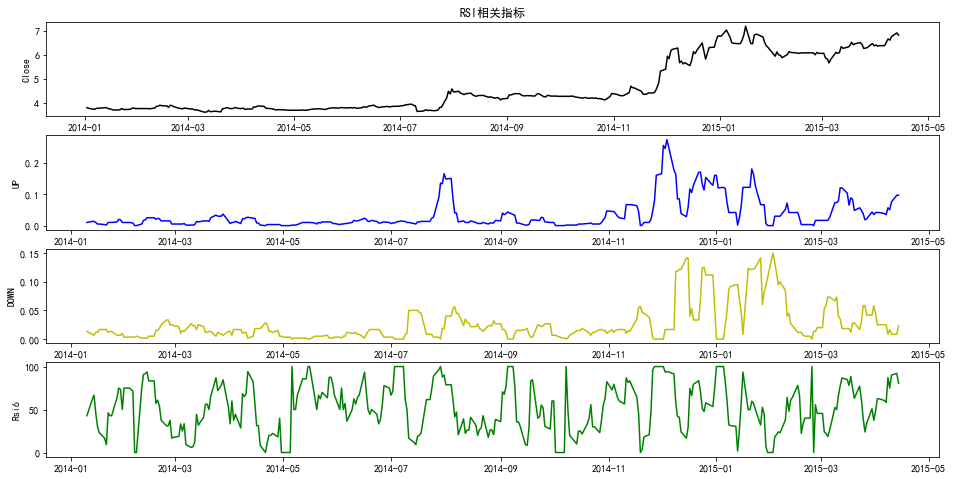

In [21]:
fig = plt.figure(figsize=(16, 8))
UP=pd.Series(SMUP,index=indexRsi)
DOWN=pd.Series(SMDOWN,index=indexRsi)
plt.rcParams['font.sans-serif'] = ['SimHei']

plt.subplot(411)
plt.plot(BOCMclp,'k')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('RSI相关指标')

plt.subplot(412)
plt.plot(UP,'b')
plt.ylabel('UP')

plt.subplot(413)
plt.plot(DOWN,'y')
plt.ylabel('DOWN')

plt.subplot(414)
plt.plot(Rsi6,'g')
plt.ylabel('Rsi6')

In [22]:
def rsi(price,period=6):
    import pandas as pd
    clprcChange=price-price.shift(1)
    clprcChange=clprcChange.dropna()
    
    indexprc=clprcChange.index
    upPrc=pd.Series(0,index=indexprc)
    upPrc[clprcChange>0]=clprcChange[clprcChange>0]
    
    downPrc=pd.Series(0,index=indexprc)
    downPrc[clprcChange<0]=-clprcChange[clprcChange<0]
    
    rsidata=pd.concat([price,clprcChange,upPrc,downPrc],\
    axis=1)
    rsidata.columns=['price','PrcChange','upPrc','downPrc']
    rsidata=rsidata.dropna();
    
    SMUP=[]
    SMDOWN=[]
    for i in range(period,len(upPrc)+1):
        SMUP.append(np.mean(upPrc.values[(i-period):i],\
        dtype=np.float32))
        SMDOWN.append(np.mean(downPrc.values[(i-period):i],\
        dtype=np.float32))
        rsi=[100*SMUP[i]/(SMUP[i]+SMDOWN[i]) \
        for i in range(0,len(SMUP))]
    indexRsi=indexprc[(period-1):]
    rsi=pd.Series(rsi,index=indexRsi)
    return(rsi)

In [23]:
Rsi12=rsi(BOCMclp,12)
Rsi12.tail()

Date
2015-04-08    57.894739
2015-04-09    59.782604
2015-04-10    77.777780
2015-04-13    80.582524
2015-04-14    73.636363
dtype: float64

In [24]:
Rsi24=rsi(BOCMclp,24)
Rsi24.tail()

Date
2015-04-08    72.522525
2015-04-09    68.867922
2015-04-10    66.666665
2015-04-13    70.334930
2015-04-14    66.976744
dtype: float64

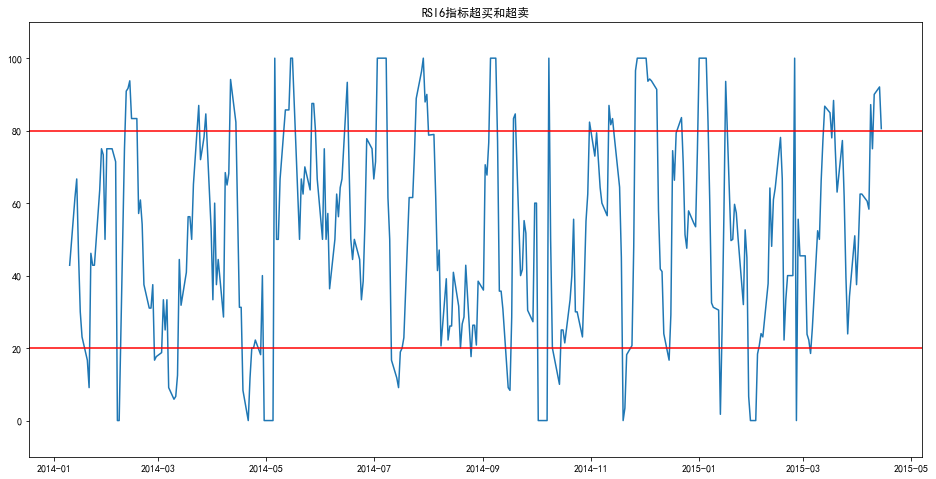

In [25]:
fig = plt.figure(figsize=(16, 8))
plt.plot(Rsi6)
plt.title('RSI6指标超买和超卖')
plt.ylim(-10,110)

plt.axhline(y=80,color='red')
plt.axhline(y=20,color='red')
plt.show()

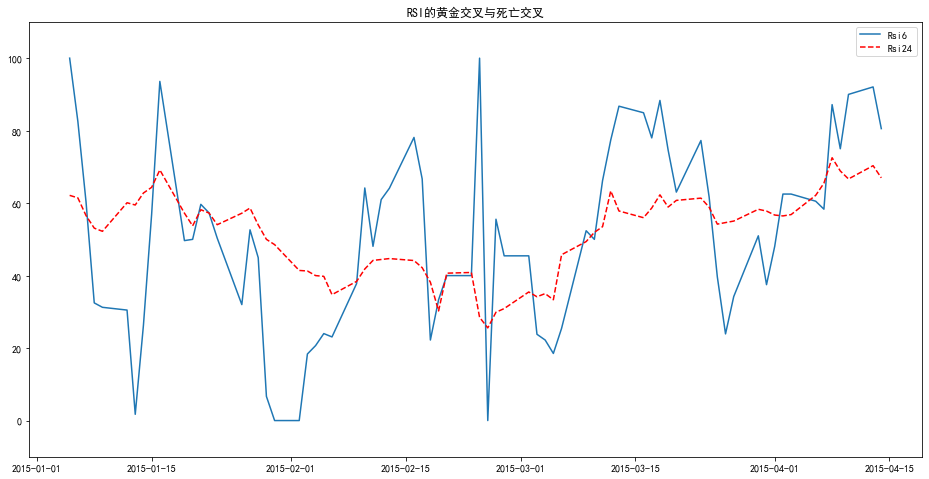

In [26]:
#黄金交叉与死亡交叉
fig = plt.figure(figsize=(16, 8))
plt.plot(Rsi6['2015-01-03':],label="Rsi6")
plt.plot(Rsi24['2015-01-03':],\
         label="Rsi24",color='red',\
         linestyle='dashed')
plt.title("RSI的黄金交叉与死亡交叉")
plt.ylim(-10,110)
plt.legend()

In [27]:
#策略模式
BOCM=pd.read_csv('BOCM.csv')
BOCM.index=BOCM.iloc[:,1]
BOCM.index=pd.to_datetime(BOCM.index, format='%Y-%m-%d')
BOCMclp=BOCM.Close
BOCMclp[0:4]

Date
2014-01-02    3.82
2014-01-03    3.79
2014-01-06    3.75
2014-01-07    3.77
Name: Close, dtype: float64

In [28]:
rsi6=rsi(BOCMclp,6)
rsi24=rsi(BOCMclp,24)

In [29]:
#rsi6捕捉买卖点
Sig1=[]
for i in rsi6:
    if i>80:
        Sig1.append(-1)
    elif i<20:
        Sig1.append(1)
    else:
        Sig1.append(0)

In [30]:
date1=rsi6.index
Signal1=pd.Series(Sig1,index=date1)
Signal1[Signal1==1].head(n=3)
Signal1[Signal1==-1].head(n=3)

Signal2=pd.Series(0,index=rsi24.index)
lagrsi6= rsi6.shift(1)
lagrsi24= rsi24.shift(1)
for i in rsi24.index:
    if (rsi6[i]>rsi24[i]) & (lagrsi6[i]<lagrsi24[i]):
        Signal2[i]=1
    elif (rsi6[i]<rsi24[i]) & (lagrsi6[i]>lagrsi24[i]):
        Signal2[i]=-1

signal=Signal1+Signal2
signal[signal>=1]=1
signal[signal<=-1]=-1
signal=signal.dropna()

tradSig=signal.shift(1)

ret=BOCMclp/BOCMclp.shift(1)-1
ret.head()

ret=ret[tradSig.index]
buy=tradSig[tradSig==1]
buyRet=ret[tradSig==1]*buy

sell=tradSig[tradSig==-1]
sellRet=ret[tradSig==-1]*sell

tradeRet=ret*tradSig

Text(0, 0.5, 'stock return')

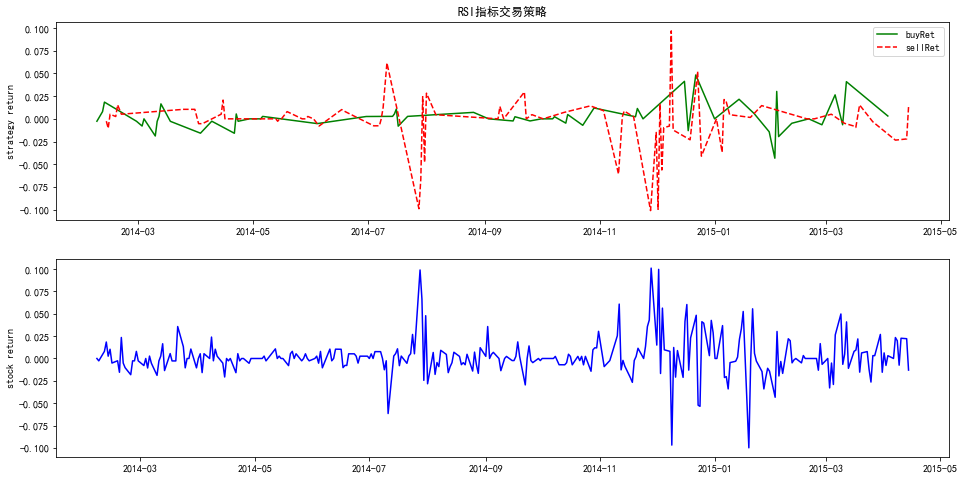

In [31]:
fig = plt.figure(figsize=(16, 8))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.subplot(211)
plt.plot(buyRet,label="buyRet",color='g')
plt.plot(sellRet,label="sellRet",color='r',linestyle='dashed')
plt.title("RSI指标交易策略")
plt.ylabel('strategy return')
plt.legend()
plt.subplot(212)
plt.plot(ret,'b')
plt.ylabel('stock return')

In [32]:
def strat(tradeSignal,ret):
    indexDate=tradeSignal.index
    ret=ret[indexDate]
    tradeRet=ret*tradeSignal
    tradeRet[tradeRet==(-0)]=0
    winRate=len(tradeRet[tradeRet>0])/len(\
    tradeRet[tradeRet!=0])
    meanWin=sum(tradeRet[tradeRet>0])/len(\
    tradeRet[tradeRet>0])
    meanLoss=sum(tradeRet[tradeRet<0])/len(\
    tradeRet[tradeRet<0])
    perform={'winRate':winRate,\
    'meanWin':meanWin,\
    'meanLoss': meanLoss}
    return(perform)

In [33]:
#策略
tradSig2=signal.shift(3)
ret2=ret[tradSig2.index]
buy2=tradSig[tradSig2==1]
buyRet2=ret2[tradSig2==1]*buy2
sell2=tradSig2[tradSig2==-1]
sellRet2=ret2[tradSig2==-1]*sell2
tradeRet2=ret2*tradSig2
BuyOnly2=strat(buy2,ret2)
SellOnly2=strat(sell2,ret2)
Trade2=strat(tradSig2,ret2)
Test2=pd.DataFrame({"BuyOnly":BuyOnly2,\
      "SellOnly":SellOnly2,"Trade":Trade2})
Test2

,BuyOnly,SellOnly,Trade
winRate,0.523810,0.537313,0.537815
meanWin,0.018347,0.017260,0.016922
meanLoss,-0.013085,-0.016942,-0.015167


In [34]:
# cumStock2=np.cumprod(1+ret2)-1
# print(cumStock2[-1])
cumTrade2=np.cumprod(1+tradeRet2)-1
print(cumTrade2[-1])

0.29917157813927653


Text(0.5, 1.0, '修改rsi执行策略累计收益率')

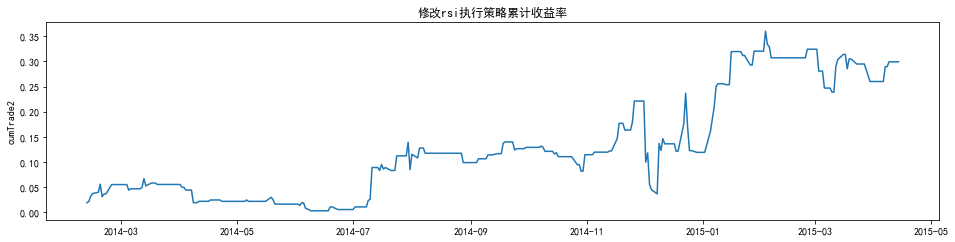

In [35]:
fig = plt.figure(figsize=(16, 8))
plt.subplot(211)
plt.plot(cumTrade2)
plt.ylabel('cumTrade2')
plt.title('修改rsi执行策略累计收益率')